#       Data Analysis of Rio de Janeiro - Housing Sales/Rental                            Prices,Venues & International Schools.


### INTRODUCTION

Rio de Janeiro is known as the “Wonderful City” and it is famous worldwide. It´s the most important tourist spot in Brazil. There are many beautiful places, especially amazing beaches. It´s considered by UNESCO as a cultural landscape. The weather is perfect, about 23 degrees all year around. 

I´ve been living here for decades, and I had the opportunity to see the city grows and develops with events such as the Soccer World Cup and the Olympic Games. I think the events that took place in the city attracted many foreign investors, especially for the real estate market. In addition, the city receives many foreign employees from multinational companies every year. However, these companies have some difficulties when these employees arrive in Rio. They have to find a house and an international school for their families. 

Therefore, I decided to do my project about oceanfront boroughs in Rio de Janeiro city, due to the fact that it is the most desired place to invest, live and visit. The most important tourist spots are in or around these boroughs, as well as many offices and main shopping centers. If a brand needs to get attention in Brazil, it will have to open a store in one of them. This project will be interesting for investors, multinational companies, tourists, foreign and Brazilian people.


### DATA ANALYSING

#### Before I start exploring the data, I will need to download all the dependencies.


In [1]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)        
import json
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
from geopy.geocoders import Yandex

import requests 
from pandas.io.json import json_normalize 
from pandas import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

print('Libraries imported.')

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::certifi-2020.6.20-py38_0
  - anaconda/win-64::certifi-2020.6.20-py38_0, defaults/win-64::ca-certificates-2020.6.24-0
  - anaconda/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0
  - defaults/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0done

# All requested packages already installed.

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::certifi-2020.6.20-py38_0
  - anaconda/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0
  - anaconda/win-64::certifi-2020.6.20-py38_0, defaults/win-64::ca-certificates-2020.6.24-0
  - defaults/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0done

# All requested packages already installed.

Libraries imported.


I´ll get in official government website of INEA – Instituto Estadual do Ambiente - file with all the beaches coordinates.

In [2]:
df = pd.read_excel('D:/Cecilia/IBM/Applied.capstone/coordenadas.praias.rio.xlsx')
df

OceanfrontBorough   Latitude  Longitude
0            Barra da Tijuca -23.015925 -43.304178
1                   Botafogo -22.948175 -43.180258
2                 Copacabana -22.970186 -43.179467
3                   Flamengo -22.929044 -43.170611
4                    Ipanema -22.987633 -43.205067
5                        Joa -23.014789 -43.289369
6                     Leblon -22.987842 -43.222278
7                       Leme -22.964064 -43.167453
8   Recreio dos Bandeirantes -23.030556 -43.467778
9                Sao Conrado -22.999253 -43.253486
10                      Urca -22.947844 -43.163544

I´ll get the data about housing average sales prices and average rental prices per square meters in SECOVIRIO – Housing Union. 

In [3]:
df1 = pd.read_excel('D:/Cecilia/IBM/Applied.capstone/precoimoveis.xlsx')
df1

OceanfrontBorough  SalesPrice  RentalPrice
0            Barra da Tijuca        9429        31.48
1                   Botafogo       11934        38.28
2                 Copacabana       11035        36.31
3                   Flamengo       10135        32.27
4                    Ipanema       18761        56.04
5                        Joa       17631        40.00
6                     Leblon       21125        57.20
7                       Leme       11609        36.42
8   Recreio dos Bandeirantes        6283        22.47
9                Sao Conrado       11377        32.39
10                      Urca       14283        44.08

Merging the dataframe with coordinates file.

In [4]:
df2 = pd.merge(df,df1)
df2.head(13)

OceanfrontBorough   Latitude  Longitude  SalesPrice  RentalPrice
0            Barra da Tijuca -23.015925 -43.304178        9429        31.48
1                   Botafogo -22.948175 -43.180258       11934        38.28
2                 Copacabana -22.970186 -43.179467       11035        36.31
3                   Flamengo -22.929044 -43.170611       10135        32.27
4                    Ipanema -22.987633 -43.205067       18761        56.04
5                        Joa -23.014789 -43.289369       17631        40.00
6                     Leblon -22.987842 -43.222278       21125        57.20
7                       Leme -22.964064 -43.167453       11609        36.42
8   Recreio dos Bandeirantes -23.030556 -43.467778        6283        22.47
9                Sao Conrado -22.999253 -43.253486       11377        32.39
10                      Urca -22.947844 -43.163544       14283        44.08

Now, some columns will be dropped and the index will be reseted, because it will be necessary to work with the separate data.

In [5]:
df5 = df2.drop(columns=['Latitude','Longitude','SalesPrice'])
df5.head(12)


OceanfrontBorough  RentalPrice
0            Barra da Tijuca        31.48
1                   Botafogo        38.28
2                 Copacabana        36.31
3                   Flamengo        32.27
4                    Ipanema        56.04
5                        Joa        40.00
6                     Leblon        57.20
7                       Leme        36.42
8   Recreio dos Bandeirantes        22.47
9                Sao Conrado        32.39
10                      Urca        44.08

In [6]:
df5.set_index('OceanfrontBorough', inplace=True)
df5.head(15)

RentalPrice
OceanfrontBorough                    
Barra da Tijuca                 31.48
Botafogo                        38.28
Copacabana                      36.31
Flamengo                        32.27
Ipanema                         56.04
Joa                             40.00
Leblon                          57.20
Leme                            36.42
Recreio dos Bandeirantes        22.47
Sao Conrado                     32.39
Urca                            44.08

In [7]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Barra da Tijuca to Urca
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RentalPrice  11 non-null     float64
dtypes: float64(1)
memory usage: 176.0+ bytes


After organizing the data, we will create a vertical bars graph to make it easier to visualize the housing average rental prices per square meters in oceanfront boroughs in Rio de Janeiro.

<Figure size 432x288 with 0 Axes>

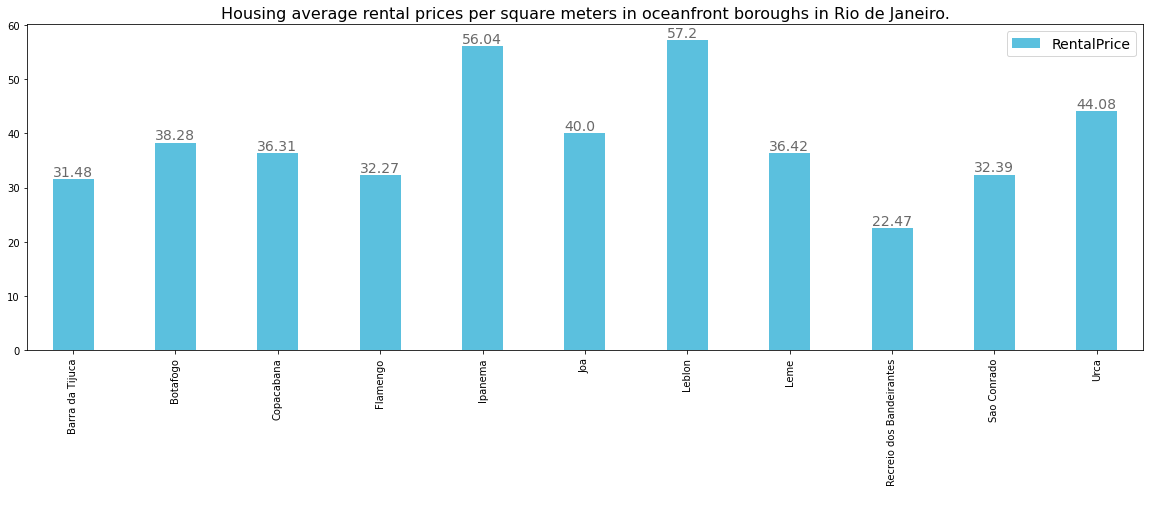

In [8]:
fig = plt.figure()

clist=["#5bc0de"]
ax = df5.plot(kind='bar', figsize=(20, 6),color = clist, width=0.4)
ax.set_title('Housing average rental prices per square meters in oceanfront boroughs in Rio de Janeiro.',fontsize =16)
ax.set_xlabel (' ',fontsize = 14)
ax.legend(['RentalPrice'],fontsize = 14)
ax.patch.set_facecolor('white')
for i in ax.patches:
      ax.text(i.get_x(), i.get_height(), str(round((i.get_height()), 2)), fontsize=14, color='dimgrey',va='bottom',ha='left')
plt.show()


We will continue to work in the same way as above, but with sales data.



In [9]:
df3 = df2.drop(columns=['Latitude','Longitude','RentalPrice'])
df3.head(12)


OceanfrontBorough  SalesPrice
0            Barra da Tijuca        9429
1                   Botafogo       11934
2                 Copacabana       11035
3                   Flamengo       10135
4                    Ipanema       18761
5                        Joa       17631
6                     Leblon       21125
7                       Leme       11609
8   Recreio dos Bandeirantes        6283
9                Sao Conrado       11377
10                      Urca       14283

In [10]:
df3.sort_values(by='SalesPrice',ascending=False,axis=0,inplace=True)
df4=df3.reset_index(drop = True)
df4.head(12)


OceanfrontBorough  SalesPrice
0                     Leblon       21125
1                    Ipanema       18761
2                        Joa       17631
3                       Urca       14283
4                   Botafogo       11934
5                       Leme       11609
6                Sao Conrado       11377
7                 Copacabana       11035
8                   Flamengo       10135
9            Barra da Tijuca        9429
10  Recreio dos Bandeirantes        6283

In [11]:
df4.set_index('OceanfrontBorough', inplace=True)
df4.head(15)


SalesPrice
OceanfrontBorough                   
Leblon                         21125
Ipanema                        18761
Joa                            17631
Urca                           14283
Botafogo                       11934
Leme                           11609
Sao Conrado                    11377
Copacabana                     11035
Flamengo                       10135
Barra da Tijuca                 9429
Recreio dos Bandeirantes        6283

In [12]:
df4.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Leblon to Recreio dos Bandeirantes
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   SalesPrice  11 non-null     int64
dtypes: int64(1)
memory usage: 176.0+ bytes


Then, we will plot a horizontal bars graph to make it easier to visualize the housing average sales prices per square meters in oceanfront boroughs in Rio de Janeiro.



<Figure size 432x288 with 0 Axes>

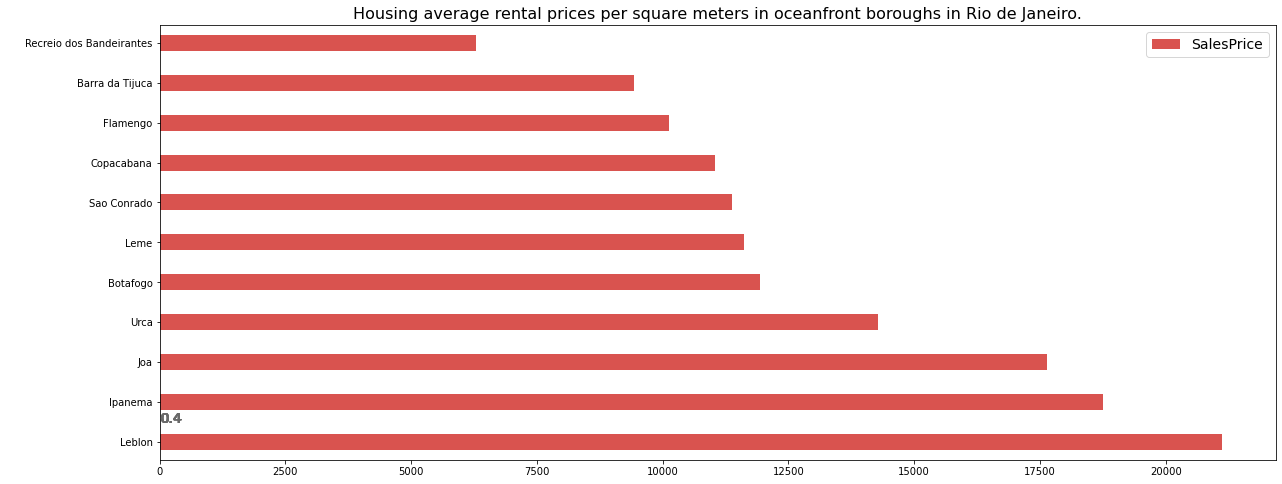

In [13]:
fig = plt.figure()

clist=["#d9534f"]
ax = df4.plot(kind='barh', figsize=(20, 8),color = clist, width=0.4)
ax.set_title('Housing average rental prices per square meters in oceanfront boroughs in Rio de Janeiro.',fontsize =16)
ax.set_ylabel (' ',fontsize = 14)
ax.legend(['SalesPrice'],fontsize = 14)
ax.patch.set_facecolor('white')
for i in ax.patches:
    ax.text(i.get_y(), i.get_height(), str(round((i.get_height()), 2)), fontsize=14, color='dimgrey',va='bottom',ha='left')
plt.show()



Let´s download the .json file in all delimited areas of Rio de Janeiro boroughs on the official government website of the Instituto Pereira Passos. And then we´ll use the Folium to plot the map.

In [14]:
url = 'https://opendata.arcgis.com/datasets/8454eb0454b7424d89c61b67742286a1_15.geojson'

geo_json_data = json.loads(requests.get(url).text)

In [15]:
rio_latitude= -22.9030
rio_longitude= -43.2096

rio_map=folium.Map(location=[rio_latitude,rio_longitude])
folium.GeoJson(geo_json_data).add_to(rio_map)
rio_map

In [16]:
word_geo=r'D:/Cecilia/IBM/Applied.capstone/maprio2.geojson'
word_map=folium.Map(location=[-22.9030,-43.2096],zoom_start=2, tiles='Mapbox Bright')
word_map


And that data was cleaned and reduced to just oceanfront boroughs.

In [17]:
rio_latitude= -22.9030
rio_longitude= -43.2096
geo_json_data='D:/Cecilia/IBM/Applied.capstone/maprio2.geojson'
rio_map=folium.Map(location=[rio_latitude,rio_longitude])
folium.GeoJson(geo_json_data).add_to(rio_map)
rio_map

Let's get the dataframe to create a map.

In [18]:
df8 =  df2.drop(columns=['Latitude','Longitude','RentalPrice'])
df8.head(15)

OceanfrontBorough  SalesPrice
0            Barra da Tijuca        9429
1                   Botafogo       11934
2                 Copacabana       11035
3                   Flamengo       10135
4                    Ipanema       18761
5                        Joa       17631
6                     Leblon       21125
7                       Leme       11609
8   Recreio dos Bandeirantes        6283
9                Sao Conrado       11377
10                      Urca       14283

Now, we´ll create a Choropleth map with housing average sales prices per square meters in oceanfront boroughs in Rio de Janeiro. It will be so easy to see which borough is more expensive.

In [19]:
world_geo =r'D:/Cecilia/IBM/Applied.capstone/maprio2.geojson'

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df8['SalesPrice'].min(),
                              df8['SalesPrice'].max(),
                              5, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map=folium.Map(location=[-22.9030,-43.2096],zoom_start=12, tiles='Stamen Terrain')
world_map.choropleth(
    geo_data=world_geo,
    data=df8,
    columns=['OceanfrontBorough', 'SalesPrice'],
    key_on='feature.properties.NOME',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Housing average sales prices per square meters in oceanfront boroughs in Rio de Janeiro.',
    reset=True
)

world_map

About international schools, I searched in Google and checked all the information. After that, the data was combined into the table with boroughs.Let's read this file below.

In [20]:
df6 = pd.read_excel('D:/Cecilia/IBM/Applied.capstone/escolasInternacionais.xlsx')
df6

InternationalSchool         OceanfrontBorough  \
0                 Our Lady of Mercy School                  Botafogo   
1   Escola Alema Corcovado-Deutsche Schule                  Botafogo   
2                 Rio International School           Barra da Tijuca   
3               Maple Bear Canadian School  Recreio dos Bandeirantes   
4               Maple Bear Canadian School           Barra da Tijuca   
5               Maple Bear Canadian School                  Botafogo   
6               Swiss International School                       Joa   
7                             Escola Eleva                  Botafogo   
8                             Escola Eleva           Barra da Tijuca   
9       Escola Americana - American School           Barra da Tijuca   
10                      The British School                  Botafogo   
11                      The British School                      Urca   
12                      The British School           Barra da Tijuca   
13                           Lycee Moliere                  Flamengo   

    Latitude  Longitude  
0  -22956040  -43193648  
1  -22950957  -43194708  
2  -23006353  -43358970  
3  -23010225  -43465244  
4  -23009178  -43321748  
5  -22944246  -43185278  
6  -23006888  -43294127  
7  -22954227  -43179175  
8  -22988470  -43361901  
9  -22994953  -43402583  
10 -22952861  -43193153  
11 -22953480  -43169240  
12 -22995571  -43391929  
13 -22933177  -43180234

Dropping coordinates.

In [21]:
df7 = df6.drop(columns=['Latitude','Longitude'])
df7.head(15)


InternationalSchool         OceanfrontBorough
0                 Our Lady of Mercy School                  Botafogo
1   Escola Alema Corcovado-Deutsche Schule                  Botafogo
2                 Rio International School           Barra da Tijuca
3               Maple Bear Canadian School  Recreio dos Bandeirantes
4               Maple Bear Canadian School           Barra da Tijuca
5               Maple Bear Canadian School                  Botafogo
6               Swiss International School                       Joa
7                             Escola Eleva                  Botafogo
8                             Escola Eleva           Barra da Tijuca
9       Escola Americana - American School           Barra da Tijuca
10                      The British School                  Botafogo
11                      The British School                      Urca
12                      The British School           Barra da Tijuca
13                           Lycee Moliere                  Flamengo

Sorting the dataframe, resetting the index and dropping the column.

In [22]:
df7.sort_values(by='OceanfrontBorough',ascending=True,axis=0,inplace=True)
df9=df7.reset_index(drop = True)
df9.head(15)


InternationalSchool         OceanfrontBorough
0                 Rio International School           Barra da Tijuca
1               Maple Bear Canadian School           Barra da Tijuca
2                             Escola Eleva           Barra da Tijuca
3       Escola Americana - American School           Barra da Tijuca
4                       The British School           Barra da Tijuca
5                 Our Lady of Mercy School                  Botafogo
6   Escola Alema Corcovado-Deutsche Schule                  Botafogo
7               Maple Bear Canadian School                  Botafogo
8                             Escola Eleva                  Botafogo
9                       The British School                  Botafogo
10                           Lycee Moliere                  Flamengo
11              Swiss International School                       Joa
12              Maple Bear Canadian School  Recreio dos Bandeirantes
13                      The British School                      Urca

In [23]:
df10 =  df9.drop(columns=['InternationalSchool'])
df10.head(15)

OceanfrontBorough
0            Barra da Tijuca
1            Barra da Tijuca
2            Barra da Tijuca
3            Barra da Tijuca
4            Barra da Tijuca
5                   Botafogo
6                   Botafogo
7                   Botafogo
8                   Botafogo
9                   Botafogo
10                  Flamengo
11                       Joa
12  Recreio dos Bandeirantes
13                      Urca

Now, get information about how many international schools there are in each borough.

In [24]:
df11 = df10['OceanfrontBorough'].value_counts()
df11



Botafogo                    5
Barra da Tijuca             5
Flamengo                    1
Joa                         1
Recreio dos Bandeirantes    1
Urca                        1
Name: OceanfrontBorough, dtype: int64

In [25]:
df12 = pd.DataFrame(df11,columns=['OceanfrontBorough'])
df12.rename(columns={"OceanfrontBorough":"Number of School"},inplace=True)
df12


Number of School
Botafogo                                 5
Barra da Tijuca                          5
Flamengo                                 1
Joa                                      1
Recreio dos Bandeirantes                 1
Urca                                     1

A pie chart will be created to visualize number of schools by boroughs.

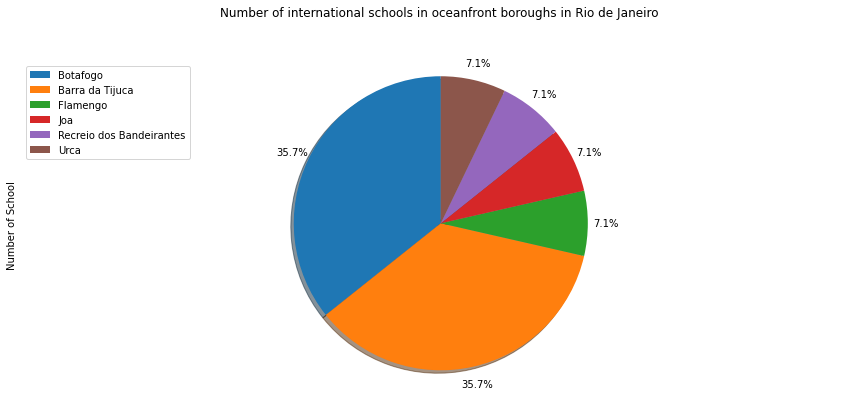

In [26]:
df12['Number of School'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,     
                            shadow=True,               
                            labels=None,
                            pctdistance=1.12
                            )

      
plt.title('Number of international schools in oceanfront boroughs in Rio de Janeiro', y=1.12)
plt.axis('equal') 
plt.legend(labels=df12.index, loc='upper left') 


plt.show()

 I´m going to define Foursquare Credentials and Version.

In [27]:
CLIENT_ID = '1STY1UIKGEW2K4EBPGCAEXGIN10KJ45XW5PCJAHQQ3R1ZUPO' 
CLIENT_SECRET = 'B4A5RFXBU4NLAR1HR25MIQDPLNL3H30AMVAXIXXM3ZPXJOBQ'
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1STY1UIKGEW2K4EBPGCAEXGIN10KJ45XW5PCJAHQQ3R1ZUPO
CLIENT_SECRET:B4A5RFXBU4NLAR1HR25MIQDPLNL3H30AMVAXIXXM3ZPXJOBQ


Getting the geographical coordinates of the most famous borough in Rio de Janeiro: Copacabana.

In [28]:
address = 'Copacabana, RJ'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Copacabana are {},{}.'.format(latitude, longitude))

The geograpical coordinate of Copacabana are -22.9719642,-43.1843432.


Ploting the Rio de Janeiro map with Oceanfront boroughs.

In [29]:
map_RiodeJaneiro = folium.Map()

for lat, lng, neighborhoods in zip(df['Latitude'], df['Longitude'], df['OceanfrontBorough']):
    label = '{}'.format(neighborhoods)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_RiodeJaneiro)  
    
map_RiodeJaneiro

We´ll work with data from Copacabana.

In [30]:
df.loc[2,'OceanfrontBorough']

'Copacabana'

Getting the geographical coordinates of Copacabana.

In [31]:
neighborhood_latitude = df.loc[2, 'Latitude'] 
neighborhood_longitude = df.loc[2, 'Longitude'] 

neighborhood_name = df.loc[2, 'OceanfrontBorough']

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Copacabana are -22.97018611, -43.17946667.


Getting the top 150 venues that are in Capacabana within a radius of 800 meters.

In [32]:
LIMIT = 150
radius = 800

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?&client_id=1STY1UIKGEW2K4EBPGCAEXGIN10KJ45XW5PCJAHQQ3R1ZUPO&client_secret=B4A5RFXBU4NLAR1HR25MIQDPLNL3H30AMVAXIXXM3ZPXJOBQ&v=20180604&ll=-22.97018611,-43.17946667&radius=800&limit=150'

Getting request and examine the resutls.

In [33]:
results = requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '5f31be649ed85e68a240ef52'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Lagoa',
  'headerFullLocation': 'Lagoa',
  'headerLocationGranularity': 'city',
  'totalResults': 132,
  'suggestedBounds': {'ne': {'lat': -22.96298610279999,
    'lng': -43.17166119464428},
   'sw': {'lat': -22.97738611720001, 'lng': -43.18727214535571}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b9a071ff964a5209c9b35e3',
       'name': 'Calçadão de Copacabana',
       'location': {'address': 'Av. Atlântica',
        'lat': -22.96824270931237,
        'lng': -43.17923539269896,
        'labeledLatLngs': [{'label': 'display',
          'lat': -22.96824270931237,
 

Creating a function that extracts the category of the venue.

In [34]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    

Cleaning up the json and structuring it in a panda data frame. We will be able to see all the venues by categories that Foursquare found in Copacabana.

In [35]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

name                 categories        lat        lng
0      Calçadão de Copacabana           Pedestrian Plaza -22.968243 -43.179235
1                 Momo Gelato             Ice Cream Shop -22.967389 -43.178866
2   Belmond Copacabana Palace                      Hotel -22.967311 -43.178954
3            Restaurante Arab  Middle Eastern Restaurant -22.968625 -43.180644
4                     Posto 3               Bathing Area -22.969939 -43.181789
5                         Spa                        Spa -22.967354 -43.178725
6      Arena Copacabana Hotel                      Hotel -22.969172 -43.181997
7              Gilson Martins                  Gift Shop -22.968883 -43.181056
8         Churrascaria Palace               Churrascaria -22.966637 -43.178540
9          Alfaia Restaurante      Portuguese Restaurant -22.966844 -43.181551
10                    Pérgula                  Hotel Bar -22.966899 -43.178968
11       Cipriani Restaurante         Italian Restaurant -22.966929 -43.178926
12                 Black Pool                       Pool -22.967178 -43.178848
13        Praia de Copacabana                      Beach -22.972441 -43.183436
14                Armazém 331                Coffee Shop -22.966901 -43.180041
15           LF Café & Bistrô                       Café -22.966109 -43.177485
16    Deliz Delícias Caseiras    Comfort Food Restaurant -22.967789 -43.183139
17          Sala Baden Powell                    Theater -22.967169 -43.180483
18               La Trattoria         Italian Restaurant -22.967762 -43.179990
19               Bicho Bacana                  Pet Store -22.967705 -43.183208

In [36]:
print('There are ' + str(nearby_venues.shape[0]) + ' venues nearby.')

There are 100 venues nearby.


We need to import Word cloud.

In [37]:
#from PIL import Image

# install wordcloud
!conda install -c conda-forge wordcloud --yes

# import package and its set of stopwords
from wordcloud import WordCloud

print ('Wordcloud is installed and imported!')

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::certifi-2020.6.20-py38_0
  - anaconda/win-64::certifi-2020.6.20-py38_0, defaults/win-64::ca-certificates-2020.6.24-0
  - anaconda/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0
  - defaults/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0done

# All requested packages already installed.

Wordcloud is installed and imported!


It´s interesting! The more a specific word appears in Foursquare venues by categories, the bigger and bolder it appears in the word cloud. Below we can easily see Copacabana venues by categories.

In [38]:
# instantiate a word cloud object
nearby_wordClouds = WordCloud(background_color='white')

# generate the word cloud
nearby_wordClouds.generate(' '.join(nearby_venues['categories'].values))

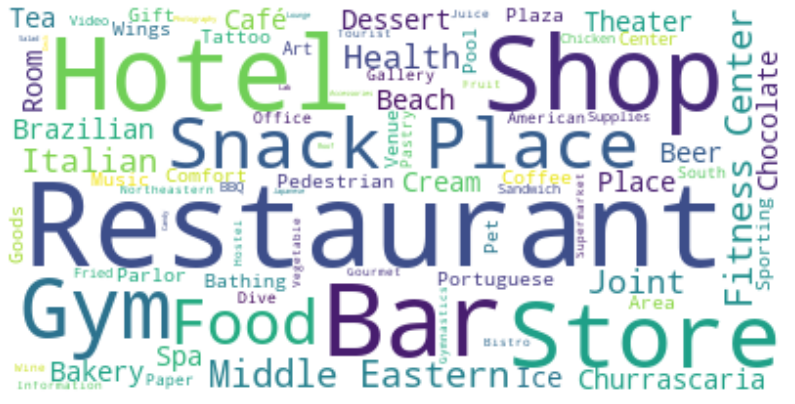

In [39]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(16) # set height

# display the cloud
plt.imshow(nearby_wordClouds, interpolation='bilinear')
plt.axis('off')
plt.show()

 Now, I´m going to explore Oceanfront boroughs in Rio de Janeiro. First, I´m going to create a function that will: create he API request URL, make the GET request and return only relevant information for each nearby venue.

In [40]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
       
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['OceanfrontBorough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Creating a new dataframe that running with function.

In [41]:
df_venues = getNearbyVenues(names=df['OceanfrontBorough'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )



Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Joa
Leblon
Leme
Recreio dos Bandeirantes
Sao Conrado
Urca


Showing and checking the size of the resulting dataframe.

In [42]:
print(df_venues.shape)
df_venues.head(20)


(406, 7)


OceanfrontBorough  Borough Latitude  Borough Longitude  \
0    Barra da Tijuca        -23.015925         -43.304178   
1    Barra da Tijuca        -23.015925         -43.304178   
2    Barra da Tijuca        -23.015925         -43.304178   
3    Barra da Tijuca        -23.015925         -43.304178   
4    Barra da Tijuca        -23.015925         -43.304178   
5    Barra da Tijuca        -23.015925         -43.304178   
6    Barra da Tijuca        -23.015925         -43.304178   
7    Barra da Tijuca        -23.015925         -43.304178   
8    Barra da Tijuca        -23.015925         -43.304178   
9    Barra da Tijuca        -23.015925         -43.304178   
10   Barra da Tijuca        -23.015925         -43.304178   
11   Barra da Tijuca        -23.015925         -43.304178   
12   Barra da Tijuca        -23.015925         -43.304178   
13   Barra da Tijuca        -23.015925         -43.304178   
14   Barra da Tijuca        -23.015925         -43.304178   
15   Barra da Tijuca        -23.015925         -43.304178   
16   Barra da Tijuca        -23.015925         -43.304178   
17   Barra da Tijuca        -23.015925         -43.304178   
18   Barra da Tijuca        -23.015925         -43.304178   
19   Barra da Tijuca        -23.015925         -43.304178   

                          Venue  Venue Latitude  Venue Longitude  \
0   Barra Leme Hotel Residência      -23.014488       -43.303466   
1                   .Org Bistrô      -23.013486       -43.305598   
2             Na Brasa Columbia      -23.014811       -43.305782   
3                        Asario      -23.014062       -43.305539   
4       Candice Cigar Co. House      -23.014835       -43.306011   
5              Barraca do Russo      -23.015767       -43.306278   
6             Drogaria Venancio      -23.013080       -43.305276   
7           Barraca do Gil/Dudu      -23.015162       -43.306339   
8            Void General Store      -23.013680       -43.305397   
9      Kite Point Team Nogueira      -23.015228       -43.307110   
10            Academia Iron Box      -23.014738       -43.303072   
11    Guacamole Cocina Mexicana      -23.013862       -43.305322   
12                  Bar do Adão      -23.013713       -43.305420   
13      Gracie Barra Rio Matriz      -23.013580       -43.304824   
14            Billabong Rio Pro      -23.015610       -43.307872   
15                  Yndu Lounge      -23.015263       -43.306970   
16                 Bar do Elias      -23.013352       -43.305330   
17               Hell's Burguer      -23.013906       -43.305539   
18                KitePoint Rio      -23.015249       -43.307052   
19     Brewteco Barra da Tijuca      -23.012689       -43.305541   

                   Venue Category  
0                           Hotel  
1   Vegetarian / Vegan Restaurant  
2            Brazilian Restaurant  
3                          Bistro  
4                          Lounge  
5                      Food Stand  
6                       Drugstore  
7                       Beach Bar  
8               Convenience Store  
9                       Surf Spot  
10             Athletics & Sports  
11             Mexican Restaurant  
12                            Bar  
13            Martial Arts School  
14                      Surf Spot  
15                         Lounge  
16      Middle Eastern Restaurant  
17                   Burger Joint  
18                      Surf Spot  
19                        Brewery

 I´d like to know how many venues were returned for each Oceanfront borough.

In [43]:
df_venues.groupby('OceanfrontBorough').count()

Borough Latitude  Borough Longitude  Venue  \
OceanfrontBorough                                                      
Barra da Tijuca                         72                 72     72   
Botafogo                                50                 50     50   
Copacabana                              38                 38     38   
Flamengo                                25                 25     25   
Ipanema                                 46                 46     46   
Joa                                      5                  5      5   
Leblon                                  78                 78     78   
Leme                                    36                 36     36   
Recreio dos Bandeirantes                26                 26     26   
Sao Conrado                              2                  2      2   
Urca                                    28                 28     28   

                          Venue Latitude  Venue Longitude  Venue Category  
OceanfrontBorough                                                          
Barra da Tijuca                       72               72              72  
Botafogo                              50               50              50  
Copacabana                            38               38              38  
Flamengo                              25               25              25  
Ipanema                               46               46              46  
Joa                                    5                5               5  
Leblon                                78               78              78  
Leme                                  36               36              36  
Recreio dos Bandeirantes              26               26              26  
Sao Conrado                            2                2               2  
Urca                                  28               28              28

Now, I’ll analyze each Oceanfront borough and group rows by OceanfrontBorough and average the frequency of occurrence for each category.

In [44]:
df_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

df_onehot['OceanfrontBorough'] = df_venues['OceanfrontBorough'] 

fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot.head()

df_grouped = df_onehot.groupby('OceanfrontBorough').mean().reset_index()
df_grouped

OceanfrontBorough  Acai House  Argentinian Restaurant  Art Gallery  \
0            Barra da Tijuca    0.013889                0.000000     0.000000   
1                   Botafogo    0.000000                0.000000     0.020000   
2                 Copacabana    0.000000                0.026316     0.026316   
3                   Flamengo    0.000000                0.000000     0.000000   
4                    Ipanema    0.000000                0.000000     0.000000   
5                        Joa    0.000000                0.000000     0.000000   
6                     Leblon    0.000000                0.000000     0.000000   
7                       Leme    0.000000                0.000000     0.000000   
8   Recreio dos Bandeirantes    0.000000                0.000000     0.000000   
9                Sao Conrado    0.000000                0.000000     0.000000   
10                      Urca    0.000000                0.000000     0.000000   

    Athletics & Sports  BBQ Joint    Bakery       Bar  Bathing Area     Beach  \
0             0.013889   0.013889  0.013889  0.069444      0.000000  0.013889   
1             0.000000   0.000000  0.000000  0.000000      0.000000  0.040000   
2             0.000000   0.026316  0.000000  0.052632      0.026316  0.026316   
3             0.000000   0.000000  0.000000  0.000000      0.000000  0.040000   
4             0.000000   0.000000  0.000000  0.000000      0.021739  0.065217   
5             0.000000   0.000000  0.000000  0.000000      0.000000  0.200000   
6             0.000000   0.000000  0.012821  0.064103      0.038462  0.012821   
7             0.000000   0.027778  0.000000  0.027778      0.027778  0.083333   
8             0.153846   0.000000  0.076923  0.000000      0.076923  0.076923   
9             0.000000   0.000000  0.000000  0.000000      0.000000  0.000000   
10            0.000000   0.000000  0.000000  0.035714      0.000000  0.035714   

    Beach Bar  Bed & Breakfast  Beer Bar  Beer Garden  Bike Shop    Bistro  \
0    0.055556         0.000000  0.000000     0.000000   0.013889  0.013889   
1    0.000000         0.000000  0.000000     0.020000   0.000000  0.020000   
2    0.026316         0.000000  0.000000     0.000000   0.000000  0.000000   
3    0.000000         0.000000  0.000000     0.040000   0.000000  0.000000   
4    0.021739         0.021739  0.000000     0.000000   0.000000  0.021739   
5    0.000000         0.000000  0.000000     0.000000   0.000000  0.000000   
6    0.038462         0.000000  0.012821     0.000000   0.000000  0.000000   
7    0.027778         0.000000  0.000000     0.055556   0.000000  0.000000   
8    0.115385         0.000000  0.000000     0.000000   0.000000  0.038462   
9    0.000000         0.000000  0.000000     0.000000   0.000000  0.000000   
10   0.000000         0.000000  0.000000     0.000000   0.000000  0.000000   

    Bookstore  Brazilian Restaurant  Breakfast Spot   Brewery  Burger Joint  \
0        0.00              0.027778        0.000000  0.013889      0.041667   
1        0.04              0.000000        0.000000  0.000000      0.020000   
2        0.00              0.026316        0.000000  0.000000      0.000000   
3        0.04              0.120000        0.000000  0.000000      0.000000   
4        0.00              0.086957        0.021739  0.000000      0.000000   
5        0.00              0.000000        0.000000  0.000000      0.000000   
6        0.00              0.076923        0.000000  0.000000      0.000000   
7        0.00              0.027778        0.000000  0.000000      0.000000   
8        0.00              0.076923        0.000000  0.000000      0.000000   
9        0.00              0.000000        0.000000  0.000000      0.000000   
10       0.00              0.035714        0.000000  0.000000      0.000000   

    Cable Car      Café    Casino  Chocolate Shop  Churrascaria  \
0    0.000000  0.000000  0.000000        0.000000      0.000000   
1    0.000000  0.000000  0.000000        0.02

 I´ll check the top 5 most common venues.

In [45]:
num_top_venues = 5

for hood in df_grouped['OceanfrontBorough']:
    print("----"+hood+"----")
    temp = df_grouped[df_grouped['OceanfrontBorough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barra da Tijuca----
                 venue  freq
0            Surf Spot  0.07
1                  Bar  0.07
2            Beach Bar  0.06
3         Burger Joint  0.04
4  Japanese Restaurant  0.04


----Botafogo----
                 venue  freq
0                Hotel  0.10
1  Japanese Restaurant  0.06
2       Ice Cream Shop  0.04
3         Dessert Shop  0.04
4           Food Truck  0.04


----Copacabana----
                   venue  freq
0                  Hotel  0.11
1     Italian Restaurant  0.05
2                    Bar  0.05
3                    Spa  0.05
4  Portuguese Restaurant  0.03


----Flamengo----
                  venue  freq
0                 Hotel  0.20
1  Brazilian Restaurant  0.12
2                  Park  0.08
3                   Gym  0.04
4          Soccer Field  0.04


----Ipanema----
                  venue  freq
0            Food Stand  0.13
1  Brazilian Restaurant  0.09
2                 Beach  0.07
3    Italian Restaurant  0.04
4                 Hotel  0.04


---

Creating the function to sort the venues in descending order.

In [46]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Creating the new dataframe and display the top 10 venues for each Oceanfront borough in Rio de Janeiro.

In [47]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['OceanfrontBorough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['OceanfrontBorough'] = df_grouped['OceanfrontBorough']
for ind in np.arange(df_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

OceanfrontBorough 1st Most Common Venue 2nd Most Common Venue  \
0            Barra da Tijuca             Surf Spot                   Bar   
1                   Botafogo                 Hotel   Japanese Restaurant   
2                 Copacabana                 Hotel    Italian Restaurant   
3                   Flamengo                 Hotel  Brazilian Restaurant   
4                    Ipanema            Food Stand  Brazilian Restaurant   
5                        Joa                 Hotel                Tunnel   
6                     Leblon            Food Stand  Brazilian Restaurant   
7                       Leme                 Hotel           Pizza Place   
8   Recreio dos Bandeirantes    Athletics & Sports             Beach Bar   
9                Sao Conrado                 Hotel      Pedestrian Plaza   
10                      Urca             Cable Car         Souvenir Shop   

   3rd Most Common Venue    4th Most Common Venue 5th Most Common Venue  \
0              Beach Bar              Pizza Place                 Hotel   
1         Ice Cream Shop  Health & Beauty Service          Dessert Shop   
2                    Spa                      Bar                  Pool   
3                   Park           History Museum  Gym / Fitness Center   
4                  Beach       Italian Restaurant                 Hotel   
5         Clothing Store                    Beach         Women's Store   
6   Gym / Fitness Center                      Bar    Italian Restaurant   
7                  Beach           Scenic Lookout              Mountain   
8                  Hotel              Pizza Place                Bakery   
9          Women's Store        French Restaurant          Dance Studio   
10            Shoe Store             Tram Station                 Trail   

   6th Most Common Venue 7th Most Common Venue          8th Most Common Venue  \
0           Burger Joint   Japanese Restaurant                         Lounge   
1                 Hostel            Food Truck                      Bookstore   
2           Churrascaria           Coffee Shop                     Restaurant   
3           Soccer Field                Museum                 Ice Cream Shop   
4         Farmers Market           Pizza Place  Paper / Office Supplies Store   
5         Farmers Market            Food Truck                     Food Stand   
6             Steakhouse          Bathing Area                      Beach Bar   
7            Beer Garden    Seafood Restaurant                           Pool   
8           Bathing Area                 Beach           Brazilian Restaurant   
9          Deli / Bodega      Department Store                   Dessert Shop   
10        Scenic Lookout  Brazilian Restaurant                    Snack Place   

      9th Most Common Venue 10th Most Common Venue  
0                  Pharmacy              Pet Store  
1                 Nightclub                  Beach  
2   Comfort Food Restaurant      Health Food Store  
3                 Bookstore            Beer Garden  
4        Mexican Restaurant          Jewelry Store  
5                      Food      Fish & Chips Shop  
6                     Hotel              Juice Bar  
7         Fish & Chips Shop            Video Store  
8                    Bistro   Fast Food Restaurant  
9                  Dive Bar              Drugstore  
10                 Mountain               Heliport

In [48]:
print(neighborhoods_venues_sorted.shape)

(11, 11)


In [49]:
df9group = df9.groupby(by=['OceanfrontBorough'])['InternationalSchool'].apply(list)
df9group

OceanfrontBorough
Barra da Tijuca             [Rio International School, Maple Bear Canadian...
Botafogo                    [Our Lady of Mercy School, Escola Alema Corcov...
Flamengo                                                      [Lycee Moliere]
Joa                                              [Swiss International School]
Recreio dos Bandeirantes                         [Maple Bear Canadian School]
Urca                                                     [The British School]
Name: InternationalSchool, dtype: object

In [50]:
df15 = pd.DataFrame(data = df9group, columns = ['InternationalSchool'])
df15.head(15)



InternationalSchool
OceanfrontBorough                                                          
Barra da Tijuca           [Rio International School, Maple Bear Canadian...
Botafogo                  [Our Lady of Mercy School, Escola Alema Corcov...
Flamengo                                                    [Lycee Moliere]
Joa                                            [Swiss International School]
Recreio dos Bandeirantes                       [Maple Bear Canadian School]
Urca                                                   [The British School]

In [51]:
neighborhoods_venues_sorted.set_index('OceanfrontBorough', inplace=True)
neighborhoods_venues_sorted.head(15)

1st Most Common Venue 2nd Most Common Venue  \
OceanfrontBorough                                                      
Barra da Tijuca                      Surf Spot                   Bar   
Botafogo                                 Hotel   Japanese Restaurant   
Copacabana                               Hotel    Italian Restaurant   
Flamengo                                 Hotel  Brazilian Restaurant   
Ipanema                             Food Stand  Brazilian Restaurant   
Joa                                      Hotel                Tunnel   
Leblon                              Food Stand  Brazilian Restaurant   
Leme                                     Hotel           Pizza Place   
Recreio dos Bandeirantes    Athletics & Sports             Beach Bar   
Sao Conrado                              Hotel      Pedestrian Plaza   
Urca                                 Cable Car         Souvenir Shop   

                         3rd Most Common Venue    4th Most Common Venue  \
OceanfrontBorough                                                         
Barra da Tijuca                      Beach Bar              Pizza Place   
Botafogo                        Ice Cream Shop  Health & Beauty Service   
Copacabana                                 Spa                      Bar   
Flamengo                                  Park           History Museum   
Ipanema                                  Beach       Italian Restaurant   
Joa                             Clothing Store                    Beach   
Leblon                    Gym / Fitness Center                      Bar   
Leme                                     Beach           Scenic Lookout   
Recreio dos Bandeirantes                 Hotel              Pizza Place   
Sao Conrado                      Women's Store        French Restaurant   
Urca                                Shoe Store             Tram Station   

                         5th Most Common Venue 6th Most Common Venue  \
OceanfrontBorough                                                      
Barra da Tijuca                          Hotel          Burger Joint   
Botafogo                          Dessert Shop                Hostel   
Copacabana                                Pool          Churrascaria   
Flamengo                  Gym / Fitness Center          Soccer Field   
Ipanema                                  Hotel        Farmers Market   
Joa                              Women's Store        Farmers Market   
Leblon                      Italian Restaurant            Steakhouse   
Leme                                  Mountain           Beer Garden   
Recreio dos Bandeirantes                Bakery          Bathing Area   
Sao Conrado                       Dance Studio         Deli / Bodega   
Urca                                     Trail        Scenic Lookout   

                         7th Most Common Venue          8th Most Common Venue  \
OceanfrontBorough                                                               
Barra da Tijuca            Japanese Restaurant                         Lounge   
Botafogo                            Food Truck                      Bookstore   
Copacabana                         Coffee Shop                     Restaurant   
Flamengo                                Museum                 Ice Cream Shop   
Ipanema                            Pizza Place  Paper / Office Supplies Store   
Joa                                 Food Truck                     Food Stand   
Leblon                            Bathing Area                      Beach Bar   
Leme                        Seafood Restaurant                           Pool   
Recreio dos Bandeirantes                 Beach           Brazilian Restaurant   
Sao Conrado                   Department Store                   Dessert Shop   
Urca                      Brazilian Restaurant                    Snack Place   

                            9th Most Common Venue 10th Most Common Venue  
OceanfrontBorough                             

In [52]:
neighborhoods_venues_sorted = pd.concat([neighborhoods_venues_sorted, df9group], axis=1)
neighborhoods_venues_sorted.head(20)

1st Most Common Venue 2nd Most Common Venue  \
Barra da Tijuca                      Surf Spot                   Bar   
Botafogo                                 Hotel   Japanese Restaurant   
Copacabana                               Hotel    Italian Restaurant   
Flamengo                                 Hotel  Brazilian Restaurant   
Ipanema                             Food Stand  Brazilian Restaurant   
Joa                                      Hotel                Tunnel   
Leblon                              Food Stand  Brazilian Restaurant   
Leme                                     Hotel           Pizza Place   
Recreio dos Bandeirantes    Athletics & Sports             Beach Bar   
Sao Conrado                              Hotel      Pedestrian Plaza   
Urca                                 Cable Car         Souvenir Shop   

                         3rd Most Common Venue    4th Most Common Venue  \
Barra da Tijuca                      Beach Bar              Pizza Place   
Botafogo                        Ice Cream Shop  Health & Beauty Service   
Copacabana                                 Spa                      Bar   
Flamengo                                  Park           History Museum   
Ipanema                                  Beach       Italian Restaurant   
Joa                             Clothing Store                    Beach   
Leblon                    Gym / Fitness Center                      Bar   
Leme                                     Beach           Scenic Lookout   
Recreio dos Bandeirantes                 Hotel              Pizza Place   
Sao Conrado                      Women's Store        French Restaurant   
Urca                                Shoe Store             Tram Station   

                         5th Most Common Venue 6th Most Common Venue  \
Barra da Tijuca                          Hotel          Burger Joint   
Botafogo                          Dessert Shop                Hostel   
Copacabana                                Pool          Churrascaria   
Flamengo                  Gym / Fitness Center          Soccer Field   
Ipanema                                  Hotel        Farmers Market   
Joa                              Women's Store        Farmers Market   
Leblon                      Italian Restaurant            Steakhouse   
Leme                                  Mountain           Beer Garden   
Recreio dos Bandeirantes                Bakery          Bathing Area   
Sao Conrado                       Dance Studio         Deli / Bodega   
Urca                                     Trail        Scenic Lookout   

                         7th Most Common Venue          8th Most Common Venue  \
Barra da Tijuca            Japanese Restaurant                         Lounge   
Botafogo                            Food Truck                      Bookstore   
Copacabana                         Coffee Shop                     Restaurant   
Flamengo                                Museum                 Ice Cream Shop   
Ipanema                            Pizza Place  Paper / Office Supplies Store   
Joa                                 Food Truck                     Food Stand   
Leblon                            Bathing Area                      Beach Bar   
Leme                        Seafood Restaurant                           Pool   
Recreio dos Bandeirantes                 Beach           Brazilian Restaurant   
Sao Conrado                   Department Store                   Dessert Shop   
Urca                      Brazilian Restaurant                    Snack Place   

                            9th Most Common Venue 10th Most Common Venue  \
Barra da Tijuca                          Pharmacy              Pet Store   
Botafogo                                Nightclub                  Beach   
Copacabana                Comfort Food Restaurant      Health Food Store   
Flamengo                                Bookstore            Beer Garden   
Ipanema                        Mexican Re

In [53]:
neighborhoods_venues_sorted.index.names = ['OceanfrontBorough']
neighborhoods_venues_sorted 

1st Most Common Venue 2nd Most Common Venue  \
OceanfrontBorough                                                      
Barra da Tijuca                      Surf Spot                   Bar   
Botafogo                                 Hotel   Japanese Restaurant   
Copacabana                               Hotel    Italian Restaurant   
Flamengo                                 Hotel  Brazilian Restaurant   
Ipanema                             Food Stand  Brazilian Restaurant   
Joa                                      Hotel                Tunnel   
Leblon                              Food Stand  Brazilian Restaurant   
Leme                                     Hotel           Pizza Place   
Recreio dos Bandeirantes    Athletics & Sports             Beach Bar   
Sao Conrado                              Hotel      Pedestrian Plaza   
Urca                                 Cable Car         Souvenir Shop   

                         3rd Most Common Venue    4th Most Common Venue  \
OceanfrontBorough                                                         
Barra da Tijuca                      Beach Bar              Pizza Place   
Botafogo                        Ice Cream Shop  Health & Beauty Service   
Copacabana                                 Spa                      Bar   
Flamengo                                  Park           History Museum   
Ipanema                                  Beach       Italian Restaurant   
Joa                             Clothing Store                    Beach   
Leblon                    Gym / Fitness Center                      Bar   
Leme                                     Beach           Scenic Lookout   
Recreio dos Bandeirantes                 Hotel              Pizza Place   
Sao Conrado                      Women's Store        French Restaurant   
Urca                                Shoe Store             Tram Station   

                         5th Most Common Venue 6th Most Common Venue  \
OceanfrontBorough                                                      
Barra da Tijuca                          Hotel          Burger Joint   
Botafogo                          Dessert Shop                Hostel   
Copacabana                                Pool          Churrascaria   
Flamengo                  Gym / Fitness Center          Soccer Field   
Ipanema                                  Hotel        Farmers Market   
Joa                              Women's Store        Farmers Market   
Leblon                      Italian Restaurant            Steakhouse   
Leme                                  Mountain           Beer Garden   
Recreio dos Bandeirantes                Bakery          Bathing Area   
Sao Conrado                       Dance Studio         Deli / Bodega   
Urca                                     Trail        Scenic Lookout   

                         7th Most Common Venue          8th Most Common Venue  \
OceanfrontBorough                                                               
Barra da Tijuca            Japanese Restaurant                         Lounge   
Botafogo                            Food Truck                      Bookstore   
Copacabana                         Coffee Shop                     Restaurant   
Flamengo                                Museum                 Ice Cream Shop   
Ipanema                            Pizza Place  Paper / Office Supplies Store   
Joa                                 Food Truck                     Food Stand   
Leblon                            Bathing Area                      Beach Bar   
Leme                        Seafood Restaurant                           Pool   
Recreio dos Bandeirantes                 Beach           Brazilian Restaurant   
Sao Conrado                   Department Store                   Dessert Shop   
Urca                      Brazilian Restaurant                    Snack Place   

                            9th Most Common Venue 10th Most Common Venue  \
OceanfrontBorough                            

In [54]:
neighborhoods_venues_sorted.reset_index(inplace=True)
neighborhoods_venues_sorted

OceanfrontBorough 1st Most Common Venue 2nd Most Common Venue  \
0            Barra da Tijuca             Surf Spot                   Bar   
1                   Botafogo                 Hotel   Japanese Restaurant   
2                 Copacabana                 Hotel    Italian Restaurant   
3                   Flamengo                 Hotel  Brazilian Restaurant   
4                    Ipanema            Food Stand  Brazilian Restaurant   
5                        Joa                 Hotel                Tunnel   
6                     Leblon            Food Stand  Brazilian Restaurant   
7                       Leme                 Hotel           Pizza Place   
8   Recreio dos Bandeirantes    Athletics & Sports             Beach Bar   
9                Sao Conrado                 Hotel      Pedestrian Plaza   
10                      Urca             Cable Car         Souvenir Shop   

   3rd Most Common Venue    4th Most Common Venue 5th Most Common Venue  \
0              Beach Bar              Pizza Place                 Hotel   
1         Ice Cream Shop  Health & Beauty Service          Dessert Shop   
2                    Spa                      Bar                  Pool   
3                   Park           History Museum  Gym / Fitness Center   
4                  Beach       Italian Restaurant                 Hotel   
5         Clothing Store                    Beach         Women's Store   
6   Gym / Fitness Center                      Bar    Italian Restaurant   
7                  Beach           Scenic Lookout              Mountain   
8                  Hotel              Pizza Place                Bakery   
9          Women's Store        French Restaurant          Dance Studio   
10            Shoe Store             Tram Station                 Trail   

   6th Most Common Venue 7th Most Common Venue          8th Most Common Venue  \
0           Burger Joint   Japanese Restaurant                         Lounge   
1                 Hostel            Food Truck                      Bookstore   
2           Churrascaria           Coffee Shop                     Restaurant   
3           Soccer Field                Museum                 Ice Cream Shop   
4         Farmers Market           Pizza Place  Paper / Office Supplies Store   
5         Farmers Market            Food Truck                     Food Stand   
6             Steakhouse          Bathing Area                      Beach Bar   
7            Beer Garden    Seafood Restaurant                           Pool   
8           Bathing Area                 Beach           Brazilian Restaurant   
9          Deli / Bodega      Department Store                   Dessert Shop   
10        Scenic Lookout  Brazilian Restaurant                    Snack Place   

      9th Most Common Venue 10th Most Common Venue  \
0                  Pharmacy              Pet Store   
1                 Nightclub                  Beach   
2   Comfort Food Restaurant      Health Food Store   
3                 Bookstore            Beer Garden   
4        Mexican Restaurant          Jewelry Store   
5                      Food      Fish & Chips Shop   
6                     Hotel              Juice Bar   
7         Fish & Chips Shop            Video Store   
8                    Bistro   Fast Food Restaurant   
9                  Dive Bar              Drugstore   
10                 Mountain               Heliport   

                                  InternationalSchool  
0   [Rio International School, Maple Bear Canadian...  
1   [Our Lady of Mercy School, Escola Alema Corcov...  
2                                                 NaN  
3                                     [Lycee Moliere]  
4                                                 NaN  
5                        [Swiss International School]  
6                                                 NaN  
7                                                 NaN  
8                        [Maple Bear Canadian School]  
9              

In [55]:
neighborhoods_venues_sorted['InternationalSchool'] =neighborhoods_venues_sorted['InternationalSchool'].replace(np.nan, 'There isn´t international school')
neighborhoods_venues_sorted

OceanfrontBorough 1st Most Common Venue 2nd Most Common Venue  \
0            Barra da Tijuca             Surf Spot                   Bar   
1                   Botafogo                 Hotel   Japanese Restaurant   
2                 Copacabana                 Hotel    Italian Restaurant   
3                   Flamengo                 Hotel  Brazilian Restaurant   
4                    Ipanema            Food Stand  Brazilian Restaurant   
5                        Joa                 Hotel                Tunnel   
6                     Leblon            Food Stand  Brazilian Restaurant   
7                       Leme                 Hotel           Pizza Place   
8   Recreio dos Bandeirantes    Athletics & Sports             Beach Bar   
9                Sao Conrado                 Hotel      Pedestrian Plaza   
10                      Urca             Cable Car         Souvenir Shop   

   3rd Most Common Venue    4th Most Common Venue 5th Most Common Venue  \
0              Beach Bar              Pizza Place                 Hotel   
1         Ice Cream Shop  Health & Beauty Service          Dessert Shop   
2                    Spa                      Bar                  Pool   
3                   Park           History Museum  Gym / Fitness Center   
4                  Beach       Italian Restaurant                 Hotel   
5         Clothing Store                    Beach         Women's Store   
6   Gym / Fitness Center                      Bar    Italian Restaurant   
7                  Beach           Scenic Lookout              Mountain   
8                  Hotel              Pizza Place                Bakery   
9          Women's Store        French Restaurant          Dance Studio   
10            Shoe Store             Tram Station                 Trail   

   6th Most Common Venue 7th Most Common Venue          8th Most Common Venue  \
0           Burger Joint   Japanese Restaurant                         Lounge   
1                 Hostel            Food Truck                      Bookstore   
2           Churrascaria           Coffee Shop                     Restaurant   
3           Soccer Field                Museum                 Ice Cream Shop   
4         Farmers Market           Pizza Place  Paper / Office Supplies Store   
5         Farmers Market            Food Truck                     Food Stand   
6             Steakhouse          Bathing Area                      Beach Bar   
7            Beer Garden    Seafood Restaurant                           Pool   
8           Bathing Area                 Beach           Brazilian Restaurant   
9          Deli / Bodega      Department Store                   Dessert Shop   
10        Scenic Lookout  Brazilian Restaurant                    Snack Place   

      9th Most Common Venue 10th Most Common Venue  \
0                  Pharmacy              Pet Store   
1                 Nightclub                  Beach   
2   Comfort Food Restaurant      Health Food Store   
3                 Bookstore            Beer Garden   
4        Mexican Restaurant          Jewelry Store   
5                      Food      Fish & Chips Shop   
6                     Hotel              Juice Bar   
7         Fish & Chips Shop            Video Store   
8                    Bistro   Fast Food Restaurant   
9                  Dive Bar              Drugstore   
10                 Mountain               Heliport   

                                  InternationalSchool  
0   [Rio International School, Maple Bear Canadian...  
1   [Our Lady of Mercy School, Escola Alema Corcov...  
2                    There isn´t international school  
3                                     [Lycee Moliere]  
4                    There isn´t international school  
5                        [Swiss International School]  
6                    There isn´t international school  
7                    There isn´t international school  
8                        [Maple Bear Canadian School]  
9              

 I´ll create 5 Oceanfront boroughs clusters.

In [56]:
kclusters = 5

df_grouped_clustering = df_grouped.drop('OceanfrontBorough', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped_clustering)

kmeans.labels_[0:10] 

array([2, 2, 2, 0, 2, 4, 2, 2, 3, 1])

Creating a new dataframe that includes the cluster as well as the top 10 venues for each oceanfront borough.

In [57]:
neighborhoods_venues_sorted.insert(0,'Cluster Labels', kmeans.labels_)

df_merged = df

df_merged = df_merged.join(neighborhoods_venues_sorted.set_index('OceanfrontBorough'), on='OceanfrontBorough')

df_merged.head(20)


OceanfrontBorough   Latitude  Longitude  Cluster Labels  \
0            Barra da Tijuca -23.015925 -43.304178               2   
1                   Botafogo -22.948175 -43.180258               2   
2                 Copacabana -22.970186 -43.179467               2   
3                   Flamengo -22.929044 -43.170611               0   
4                    Ipanema -22.987633 -43.205067               2   
5                        Joa -23.014789 -43.289369               4   
6                     Leblon -22.987842 -43.222278               2   
7                       Leme -22.964064 -43.167453               2   
8   Recreio dos Bandeirantes -23.030556 -43.467778               3   
9                Sao Conrado -22.999253 -43.253486               1   
10                      Urca -22.947844 -43.163544               2   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0              Surf Spot                   Bar             Beach Bar   
1                  Hotel   Japanese Restaurant        Ice Cream Shop   
2                  Hotel    Italian Restaurant                   Spa   
3                  Hotel  Brazilian Restaurant                  Park   
4             Food Stand  Brazilian Restaurant                 Beach   
5                  Hotel                Tunnel        Clothing Store   
6             Food Stand  Brazilian Restaurant  Gym / Fitness Center   
7                  Hotel           Pizza Place                 Beach   
8     Athletics & Sports             Beach Bar                 Hotel   
9                  Hotel      Pedestrian Plaza         Women's Store   
10             Cable Car         Souvenir Shop            Shoe Store   

      4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0               Pizza Place                 Hotel          Burger Joint   
1   Health & Beauty Service          Dessert Shop                Hostel   
2                       Bar                  Pool          Churrascaria   
3            History Museum  Gym / Fitness Center          Soccer Field   
4        Italian Restaurant                 Hotel        Farmers Market   
5                     Beach         Women's Store        Farmers Market   
6                       Bar    Italian Restaurant            Steakhouse   
7            Scenic Lookout              Mountain           Beer Garden   
8               Pizza Place                Bakery          Bathing Area   
9         French Restaurant          Dance Studio         Deli / Bodega   
10             Tram Station                 Trail        Scenic Lookout   

   7th Most Common Venue          8th Most Common Venue  \
0    Japanese Restaurant                         Lounge   
1             Food Truck                      Bookstore   
2            Coffee Shop                     Restaurant   
3                 Museum                 Ice Cream Shop   
4            Pizza Place  Paper / Office Supplies Store   
5             Food Truck                     Food Stand   
6           Bathing Area                      Beach Bar   
7     Seafood Restaurant                           Pool   
8                  Beach           Brazilian Restaurant   
9       Department Store                   Dessert Shop   
10  Brazilian Restaurant                    Snack Place   

      9th Most Common Venue 10th Most Common Venue  \
0                  Pharmacy              Pet Store   
1                 Nightclub                  Beach   
2   Comfort Food Restaurant      Health Food Store   
3                 Bookstore            Beer Garden   
4        Mexican Restaurant          Jewelry Store   
5                      Food      Fish & Chips Shop   
6                     Hotel              Juice Bar   
7         Fish & Chips Shop            Video Store   
8                    Bistro   Fast Food Restaurant   
9                  Dive Bar              Drugstore   
10                 Mountain               Heliport   

                                  Internationa

Ploting the clusters.

In [58]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['OceanfrontBorough'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


Examing all clusters. 

In [59]:
df_merged.loc[df_merged['Cluster Labels'] == 0, df_merged.columns[[0] + list(range(5, df_merged.shape[0]))]]

OceanfrontBorough 2nd Most Common Venue 3rd Most Common Venue  \
3          Flamengo  Brazilian Restaurant                  Park   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
3        History Museum  Gym / Fitness Center          Soccer Field   

  7th Most Common Venue  
3                Museum

In [60]:
df_merged.loc[df_merged['Cluster Labels'] == 1, df_merged.columns[[0] + list(range(5, df_merged.shape[0]))]]

OceanfrontBorough 2nd Most Common Venue 3rd Most Common Venue  \
9       Sao Conrado      Pedestrian Plaza         Women's Store   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
9     French Restaurant          Dance Studio         Deli / Bodega   

  7th Most Common Venue  
9      Department Store

In [61]:
df_merged.loc[df_merged['Cluster Labels'] == 2, df_merged.columns[[0] + list(range(5, df_merged.shape[0]))]]

OceanfrontBorough 2nd Most Common Venue 3rd Most Common Venue  \
0    Barra da Tijuca                   Bar             Beach Bar   
1           Botafogo   Japanese Restaurant        Ice Cream Shop   
2         Copacabana    Italian Restaurant                   Spa   
4            Ipanema  Brazilian Restaurant                 Beach   
6             Leblon  Brazilian Restaurant  Gym / Fitness Center   
7               Leme           Pizza Place                 Beach   
10              Urca         Souvenir Shop            Shoe Store   

      4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0               Pizza Place                 Hotel          Burger Joint   
1   Health & Beauty Service          Dessert Shop                Hostel   
2                       Bar                  Pool          Churrascaria   
4        Italian Restaurant                 Hotel        Farmers Market   
6                       Bar    Italian Restaurant            Steakhouse   
7            Scenic Lookout              Mountain           Beer Garden   
10             Tram Station                 Trail        Scenic Lookout   

   7th Most Common Venue  
0    Japanese Restaurant  
1             Food Truck  
2            Coffee Shop  
4            Pizza Place  
6           Bathing Area  
7     Seafood Restaurant  
10  Brazilian Restaurant

In [62]:
df_merged.loc[df_merged['Cluster Labels'] == 3, df_merged.columns[[0] + list(range(5, df_merged.shape[0]))]]

OceanfrontBorough 2nd Most Common Venue 3rd Most Common Venue  \
8  Recreio dos Bandeirantes             Beach Bar                 Hotel   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
8           Pizza Place                Bakery          Bathing Area   

  7th Most Common Venue  
8                 Beach

In [63]:
df_merged.loc[df_merged['Cluster Labels'] == 4, df_merged.columns[[0] + list(range(5, df_merged.shape[0]))]]

OceanfrontBorough 2nd Most Common Venue 3rd Most Common Venue  \
5               Joa                Tunnel        Clothing Store   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
5                 Beach         Women's Store        Farmers Market   

  7th Most Common Venue  
5            Food Truck

It was interesting create the clusters due we could notice some oceanfront boroughs are quite different than each  others. 

To be easier to understand the data, I´ll plotting the information about international schools and Housing average sales prices per square meters together on the choropleth map about oceanfront borough of Rio de Janeiro.


In [64]:
world_geo =r'D:/Cecilia/IBM/Applied.capstone/maprio2.geojson'

threshold_scale = np.linspace(df8['SalesPrice'].min(),
                              df8['SalesPrice'].max(),
                              5, dtype=int)
threshold_scale = threshold_scale.tolist() 
threshold_scale[-1] = threshold_scale[-1] + 1 

world_map=folium.Map(location=[-22.9030,-43.2096],zoom_start=12, tiles='Stamen Terrain')
world_map.choropleth(
    geo_data=world_geo,
    data=df8,
    columns=['OceanfrontBorough', 'SalesPrice'],
    key_on='feature.properties.NOME',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Housing average sales prices per square meters in oceanfront boroughs in Rio de Janeiro.',
    reset=True)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster,school in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['OceanfrontBorough'], df_merged['Cluster Labels'],df_merged['InternationalSchool']):
    label = folium.Popup(str(poi) + ' - InternationalSchool ' + str(school),parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(world_map)
       
world_map